# **Introduction**

In the modern era, Artificial Intelligence (AI) has become an integral part of our daily lives, revolutionizing industries and redefining the way we interact with technology. From self-driving cars to personalized medicine, the applications of AI are vast and transformative. However, with this rapid expansion comes a set of unique challenges that must be addressed to ensure the safe and effective deployment of AI systems.

**Security** is paramount. As AI models become integral to critical systems, they become targets. Malicious actors are increasingly exploring ways to deceive and manipulate AI models through adversarial inputs. Such vulnerabilities can have dire consequences, especially in high-stakes applications like autonomous driving or medical diagnostics.

**Bias** in AI is another pressing concern. Models trained on biased data can perpetuate or even exacerbate existing prejudices, leading to unfair or discriminatory outcomes. In content generation, for instance, unintended biases can manifest in outputs that are misleading or offensive.

When it comes to **Large Language Models (LLMs)**, two additional challenges arise:

- **Alignment**: It's crucial that these models not only generate coherent responses but also truly understand and adhere to user intent. Misalignment can lead to outputs that, while grammatically correct, might be contextually inappropriate or misleading.

- **Safety**: Given the vast knowledge and generative capabilities of LLMs, there's a risk of producing outputs that could be harmful, misleading, or inappropriate. Ensuring the safety of these outputs is of utmost importance.

To address these challenges, especially those related to security, tools like the **Adversarial Robustness Toolbox (ART)** have emerged as invaluable assets. Throughout this tutorial, we will use the ART library, a leading Python library dedicated to adversarial machine learning. It provides a rich set of functionalities to craft adversarial attacks, implement defenses, and evaluate the robustness of AI models.

# Table of Contents
* Background: AI Models and Adversarial Threats
    1. Evasion Attacks
    2. Poisoning Attacks
    3. Extraction Attacks
    4. Inference Attacks
* Crafting Adversarial Examples
* Defending Against Attacks
    1. Defence Against Evasion Attacks
    2. Defence Against Poisoning Attacks
    3. Defence Against Extraction Attacks
    4. Defence Against Inference Attacks
* Conclusion and Further Reading

---

## **Background: AI Models and Threats**


Artificial Intelligence (AI) systems are mathematical constructs trained to perform specific tasks by learning patterns from data. The most prevalent form of AI-systems today is machine learning (ML), where models are trained to make predictions or decisions based on input data. Deep learning is a subset of ML that uses neural networks to model complex patterns in large datasets. These models have been particularly successful in tasks like image processing, speech recognition, and natural language processing (NLP).

However, these models are not infallible. Their reliance on data and the patterns they learn make them susceptible to various threats, especially when malicious actors aim to deceive or exploit them.

<center><img src="imgs/adversarial_threats_attacker.PNG" width="600" height="400"/></center>


Understanding potential threats against AI-systems is crucial. Here, we introduce the most relevant attacks on AI-systems:



### 1. **Evasion Attacks**:
   In these attacks, attackers tweak the input data to deceive a trained model and cause a misclassification. This tweaked input is called an adversarial example. Evasion attacks can be separated into targeted attacks, where the attacker forces the model to predict a desired target value, and untargeted attacks that cause a general reduction in model accuracy or prediction confidence. These attacks can take place in both the physical and digital worlds.

   One of the most famous examples is an image of a panda. By adding a small, almost imperceptible noise to the image, a deep learning model misclassifies it as a "gibbon" instead of a "panda", even though to human eyes, the image still clearly looks like a panda.

   <center><img src="imgs/adversarial_example.PNG" width="800" height="300"/></center>
   
   *_[Image Source](https://www.tensorflow.org/tutorials/generative/adversarial_fgsm)_*.

   - **Physical World Application**: Evasion attacks are not limited to the digital space. For instance, psychedelic garments can be used to trick facial recognition software into misidentifying a person. By wearing clothes with specific patterns and colors, one can be misclassified as an animal, like a zebra or giraffe, effectively evading detection.

   <center><img src="imgs/trick_ai_system.PNG" width="800" height="300"/></center>

   *_[Image Source](https://www.thisiscolossal.com/2023/02/capable-facial-recognition-textiles/)_*.
   


### 2. **Poisoning Attacks**:
   In poisoning attacks, adversaries introduce malicious or incorrect data points into the AI system's training set during the training phase. This manipulation affects the model's behavior, leading to incorrect predictions or classifications during the inference phase. 

   - **Types of Poisoning Attacks**:
        - **Accuracy Drop Attack**: This attack involves adding malicious samples to the training data to reduce the model’s performance during testing.
        
        - **Target Misclassification Attack**: The goal here is to manipulate the model so that specific test samples are incorrectly classified during testing.
        
        - **Backdoor Attack**: Attackers insert a trigger in the input that causes a predetermined response from the model, while the system performs normally when the trigger is absent. For example, [researchers](https://arxiv.org/pdf/1708.06733v1.pdf) trained an image recognition AI to misinterpret a Stop road sign as a speed limit indicator when objects like a Post-it, a bomb sticker, or a flower sticker were placed on the Stop sign. 

      <center><img src="imgs/AI-backdoor-sign.PNG" width="800" height="250"/></center>

       *_[Image Source](https://arxiv.org/pdf/1708.06733v1.pdf)_*.



### 3. **Extraction Attacks**:
   The primary goal of extraction attacks is to steal or replicate the architecture, parameters, or knowledge embedded in a machine learning model. Attackers aim to create a similar model without authorization.
   
   **How they do it**: Attackers query the target model multiple times and use the outputs to understand the model's behavior, structure, or parameters. They may try to reverse-engineer the model or train a functionally equivalent model using the obtained results.
   These attacks often target machine learning models deployed as a service, where users can input data and receive predictions without having direct access to the model's parameters or architecture.

   **Example**: An attacker sends a variety of inputs to a machine learning model and collects the corresponding outputs. They then use this data to train a replica of the target model.

### 4. **Inference Attacks**:

These attacks try to figure out information about the data used to train the model. They're not about copying the model but learning secrets about the data it was trained on.

**How they do it**:Attackers analyze the model’s predictions to gain insights into the data it was trained on. They might use this to uncover sensitive or private information about individual data points or overall data distributions.

**Example**: An attacker queries a machine learning model trained on medical data and, by analyzing the outputs, is able to infer whether specific individuals’ data were included in the training set, or deduce sensitive attributes like a particular medical condition.


> - **Extraction Attacks**: Focus on stealing the model's architecture, parameters, or embedded knowledge to replicate the model.
> - **Inference Attacks**: Focus on uncovering sensitive information about the model’s training data, leading to potential privacy violations.


Understanding these threats is the first step in the journey of AI robustness and security. As we delve deeper into this tutorial, we'll explore how these attacks are crafted. Specifically, we will go through a hands-on example of a popular approach to creating adversarial examples, namely the Fast Gradient Sign Method (FGSM). This method showcases how seemingly minor perturbations to input data can lead to significant misclassifications by AI models. Using the Adversarial Robustness Toolbox (ART), we'll demonstrate the practical implementation of FGSM and how models can be defended against such attacks.

# Crafting Adversarial Examples:
In this section, we will demonstrate a simple example of using [ART](https://github.com/Trusted-AI/adversarial-robustness-toolbox).  ART provides tools that enable developers and researchers to defend and evaluate Machine Learning models against the adversarial threats of Evasion, Poisoning, Extraction, and Inference. 

For the scope of this article, we will focus on an evasion attack, showcasing how adversarial examples can be crafted to mislead a trained model during the inference phase. In subsequent articles, we will explore other types of threats, delving into poisoning, extraction, and inference attacks, and demonstrating how to mitigate these risks.

The example here trains a convolutional neural network on the MNIST dataset and creates adversarial examples using the Fast Gradient Sign Method. We use the ART classifier to train the model. Let's import the necessary libraries and set a seed for reproducibility.

In [1]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import PyTorchClassifier
from art.utils import load_mnist

torch.manual_seed(42)
from tqdm.auto import tqdm

We're loading the MNIST dataset and preparing it for PyTorch processing:

In [2]:
# Step 1: Load the MNIST dataset

(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()

# Step 1a: Swap axes to PyTorch's NCHW format (batch size, channels, height, width)

x_train = np.transpose(x_train, (0, 3, 1, 2)).astype(np.float32)
x_test = np.transpose(x_test, (0, 3, 1, 2)).astype(np.float32)

x_train.shape, y_train.shape


((60000, 1, 28, 28), (60000, 10))

Let's visualize a subset of images from the training dataset.

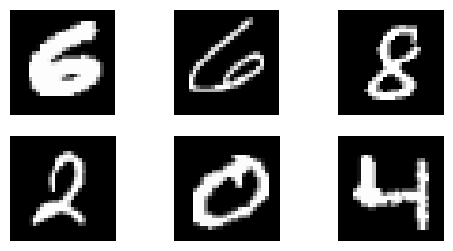

In [3]:
fig = plt.figure(figsize=(6, 3))
rows, cols = 2, 3
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(x_train), size=[1]).item()
    img = x_train[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.axis(False)

In the following code, we define a TinyVGG-like model for classifying MNIST data, utilizing cross-entropy loss and the SGD optimizer:

In [4]:
# Step 2: Define the neural network model
class MNISTModel(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1,      # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

model = MNISTModel(input_shape=1, 
    hidden_units=10, 
    output_shape=len(y_train[0])).to(device)

# Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)

Using device: cpu


In this step, we're integrating the previously defined PyTorch model with ART by creating an `ART classifier`. The ``PyTorchClassifier`` is initialized with several parameters including the model, clipping values for input data and a loss function. This wraps the PyTorch model, allowing it to **interact seamlessly** with various ART functionalities:

In [5]:
# Step 3: Create the ART classifier 

classifier = PyTorchClassifier(
    model=model,
    clip_values=(0.0, 255.0),
    loss=loss_fn,
    optimizer=optimizer,
    input_shape=(1, 28, 28),
    nb_classes=len(y_train[0]),
    device_type=device
)

# Step 4: Train the ART classifier

classifier.fit(x_train, y_train, batch_size=64, nb_epochs=3)

In [6]:
# Step 5: Evaluate the ART classifier on benign (non-adversarial) test examples

predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

Accuracy on benign test examples: 97.82%


This high accuracy indicates that our classifier is highly effective in correctly classifying non-adversarial images. Let's generate adversarial test examples using the Fast Gradient Method and see how well the model is able to classify them:

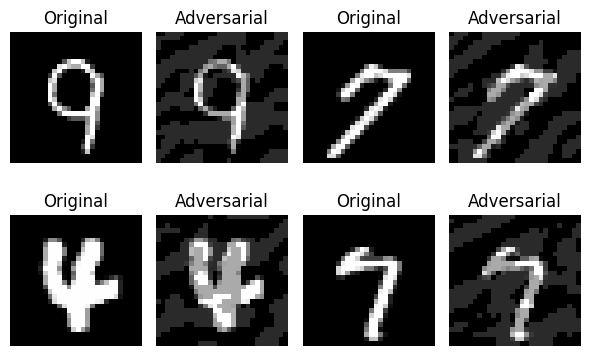

In [9]:
# Step 6: Generate adversarial test examples
attack = FastGradientMethod(estimator=classifier, eps=0.2)
x_test_adv = attack.generate(x=x_test)

# Plot adversarial examples beside the original ones
fig = plt.figure(figsize=(6, 4))  
rows, cols = 2, 2

for i in range(rows):
    for j in range(cols):
        random_idx = torch.randint(0, len(x_test_adv), size=[1]).item()
        
        # Plot original image
        ax1 = fig.add_subplot(rows, 2*cols, 2*j + 1 + i*2*cols)
        ax1.imshow(x_test[random_idx].squeeze(), cmap="gray")
        ax1.set_title("Original")
        ax1.axis(False)
        
        # Plot adversarial image
        ax2 = fig.add_subplot(rows, 2*cols, 2*j + 2 + i*2*cols)
        ax2.imshow(x_test_adv[random_idx].squeeze(), cmap="gray")
        ax2.set_title("Adversarial")
        ax2.axis(False)

plt.tight_layout()
plt.show()

In [10]:
# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

Accuracy on adversarial test examples: 11.74%


The sharp drop in accuracy on adversarial test examples underscores the model's vulnerability to adversarial attacks. Despite performing well on benign test examples, the model struggles significantly when faced with inputs that have been subtly and maliciously perturbed, highlighting a critical area for improvement in enhancing the model's robustness against such attacks.

# **Defending Against Attacks**

Various defense strategies can be employed depending on the type of attack. Below, we outline some methods to counter evasion, poisoning, extraction, and inference attacks. 

### 1. **Defence Against Evasion Attacks:**
   - **Adversarial Retraining:** This method involves iteratively generating adversarial examples and incorporating them into the training dataset. The model is then repeatedly trained on this augmented dataset, enhancing its robustness against specific adversarial perturbations.
   - **Data Diversity:** Enriching the dataset with a diverse and high quality training data ensures better generalization and resilience against evasion attacks.

### 2. **Defence Against Poisoning Attacks:**
   - **Verified Sources and Developers:** Validate the credibility of both the sources providing training data, models, and code, and the developers involved, to safeguard against the integration of malicious elements.
   - **Find Triggers:** Implement mechanisms to detect unusual patterns or triggers that indicate backdoor attacks.
   - **Retraining:** Regularly update and retrain models with clean, verified data to mitigate the effects of poisoning.
   - **Regularization:** Apply techniques to limit the complexity of the model, reducing its susceptibility to overfitting on poisoned data.

### 3. **Defence Against Extraction Attacks:**
   - **Output Restriction:** Limiting the scope or precision of the model’s output values can increase the effort required for attackers to replicate the model.
   - **Rate Limiting:** Implement restrictions on the number of queries to the model to make extraction more challenging.

### 4. **Defence Against Inference Attacks:**
   - **Data Sanitization:** Use anonymization techniques to remove sensitive data, making it difficult for attackers to access private information.
   - **Differential Privacy:** Introduce controlled noise to the data or queries, ensuring that the output does not reveal sensitive information about individual data points while maintaining overall data utility.

Before deploying your ML model, conduct a risk analysis to assess the potential impact and likelihood of attacks. Simulating specific attacks is also advisable to evaluate your system's vulnerabilities and the efficacy of your defense strategies.

Let's continue with our example above to perform adversarial retraining on our convolutional classifier:

In [11]:
# Step 8: Generate adversarial training examples
x_train_adversarial = attack.generate(x=x_train[:2000])
y_train_adversarial = y_train[:2000]

x_train_combined = np.concatenate((x_train, x_train_adversarial))
y_train_combined = np.concatenate((y_train, y_train_adversarial))

In [12]:
# Step 9: Retrain the ART classifier on combined (original and adversarial) training examples

classifier.fit(x_train_combined, y_train_combined, batch_size=64, nb_epochs=3)

In [13]:
# Step 10: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

Accuracy on adversarial test examples: 88.23%


As expected, the increased accuracy indicates that the model has become more robust following adversarial retraining. 

You can repeat steps 3-5 until the model is sufficiently adversarially robust. It is worth mentioning that adversarial retraining can lead to overfitting. Therefore, there are a number of things that can be done to reduce the risk of overfitting when performing adversarial retraining:

* Use a variety of adversarial attacks to generate adversarial examples. This will help to ensure that the model is robust to a wide range of adversarial attacks, rather than just a specific type of attack.
* Use a large and diverse training dataset. This will help to ensure that the model is able to generalize to new data, even if the adversarial examples used to train the model are not perfectly representative of all possible adversarial attacks.
* Use early stopping: monitor the model's performance on a validation set and stop training when the performance starts to degrade.

# Conclusion and Further Reading:

In this article, we’ve explored AI security, focusing on the challenges of different types of attacks and how to defend against them. We used the Adversarial Robustness Toolbox (ART) to show real-world examples of these challenges and solutions.

As AI becomes more ingrained in our daily lives and business operations, and especially with the advent of powerful tools like LLMs, securing these systems against malicious attacks is paramount.

For those looking to dig deeper, there are many specialized resources available that offer more comprehensive information on AI security:
* [Artificial Intelligence (AI) Governance and Cyber-Security: A beginner’s handbook on securing and governing AI systems](https://www.amazon.de/-/en/Taimur-Ijlal/dp/B09YHK8L2T).
* [AI security concerns in a nutshell - Practical AI-Security guide](https://www.bsi.bund.de/SharedDocs/Downloads/EN/BSI/KI/Practical_Al-Security_Guide_2023.html).
* [AI-systems: develop them securely](https://english.aivd.nl/publications/publications/2023/02/15/ai-systems-develop-them-securely).
* [Securing Machine Learning Algorithms](https://www.enisa.europa.eu/publications/securing-machine-learning-algorithms).


